In [ ]:
#import tensorflow as tf
#import tflearn
#from tflearn.layers.conv import conv_2d,max_pool_2d
#from tflearn.layers.core import input_data,dropout,fully_connected
#from tflearn.layers.estimator import regression
#import numpy as np
#import cv2
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!unzip Data.zip -d Data

Archive:  Data.zip
replace Data/Data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Load Images from Fist
X_train = []
for i in range(0, 2000):
    name = 'Data/Data/Train/fist/fist_' + str(i) + '.png'
    print(name)
    image = cv2.imread('Data/Data/Train/fist/fist_' + str(i) + '.png')
    print(type(image))
    print(image.shape)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("gray_img shape", gray_image.shape)
    loadedImages.append(gray_image.reshape(240,215,1))

#Load Images From Hi
for i in range(0, 2000):
    name2 = 'Data/Data/Train/hi/hi_' + str(i) + '.png'
    print(name2)
    image = cv2.imread('Data/Data/Train/hi/hi_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    loadedImages.append(gray_image.reshape(240, 215, 1))
    
#Load Images From Peace
for i in range(0, 2000):
    name3 = 'Data/Data/Train/peace/peace_' + str(i) + '.png'
    print(name3)
    image = cv2.imread('Data/Data/Train/peace/peace_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    loadedImages.append(gray_image.reshape(240, 215, 1))

Streaming output truncated to the last 5000 lines.
Data/Data/Train/fist/fist_1750.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1751.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1752.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1753.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1754.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1755.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1756.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1757.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1758.png
<class 'numpy.ndarray'>
(215, 240, 3)
gray_img shape (215, 240)
Data/Data/Train/fist/fist_1759.png
<class 'numpy.ndarray'>

In [ ]:
loadedImages = np.array(loadedImages)

In [ ]:
# Create OutputVector

Y_train = []
for i in range(0, 2000):
    outputVectors.append([1, 0, 0])

for i in range(0, 2000):
    outputVectors.append([0, 1, 0])

for i in range(0, 2000):
    outputVectors.append([0, 0, 1])

In [ ]:
Y_train = np.array(outputVectors)


In [ ]:
X_test = []

#Load Images for Fist
for i in range(2000, 3000):
    image = cv2.imread('Data/Data/Test/fist/fist_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    testImages.append(gray_image.reshape(240, 215, 1))

#Load Images for Hi
for i in range(2000, 3000):
    image = cv2.imread('Data/Data/Test/hi/hi_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    testImages.append(gray_image.reshape(240, 215, 1))
    
#Load Images for Peace
for i in range(2000, 3000):
    image = cv2.imread('Data/Data/Test/peace/peace_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    testImages.append(gray_image.reshape(240, 215, 1))

X_test = np.array(X_test)

Y_test = []

for i in range(0, 1000):
    testLabels.append([1, 0, 0])
    
for i in range(0, 1000):
    testLabels.append([0, 1, 0])

for i in range(0, 1000):
    testLabels.append([0, 0, 1])

numpy.ndarray

In [ ]:
Y_test = np.array(Y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (240,215,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(units = 24 , activation = 'softmax'))
model.add(Dense(units = 3 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 240, 215, 75)      750       
_________________________________________________________________
batch_normalization_12 (Batc (None, 240, 215, 75)      300       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 120, 108, 75)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 120, 108, 50)      33800     
_________________________________________________________________
dropout_8 (Dropout)          (None, 120, 108, 50)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 120, 108, 50)      200       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 60, 54, 50)       

In [ ]:
# Shuffle Training Data
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)

from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# Train model
history = model.fit(X_train, Y_train, epochs=3,
           validation_data = (X_test, Y_test),
           verbose = 2, callbacks = [learning_rate_reduction])

Epoch 1/3
188/188 - 1384s - loss: 0.0199 - accuracy: 0.9975 - val_loss: 1.1949e-04 - val_accuracy: 1.0000
Epoch 2/3
188/188 - 1386s - loss: 0.0208 - accuracy: 0.9975 - val_loss: 0.0533 - val_accuracy: 0.9953
Epoch 3/3

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 - 1384s - loss: 0.0114 - accuracy: 0.9992 - val_loss: 0.2643 - val_accuracy: 0.9917


In [ ]:
model.save("PeaceModel.tfl")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: PeaceModel.tfl/assets


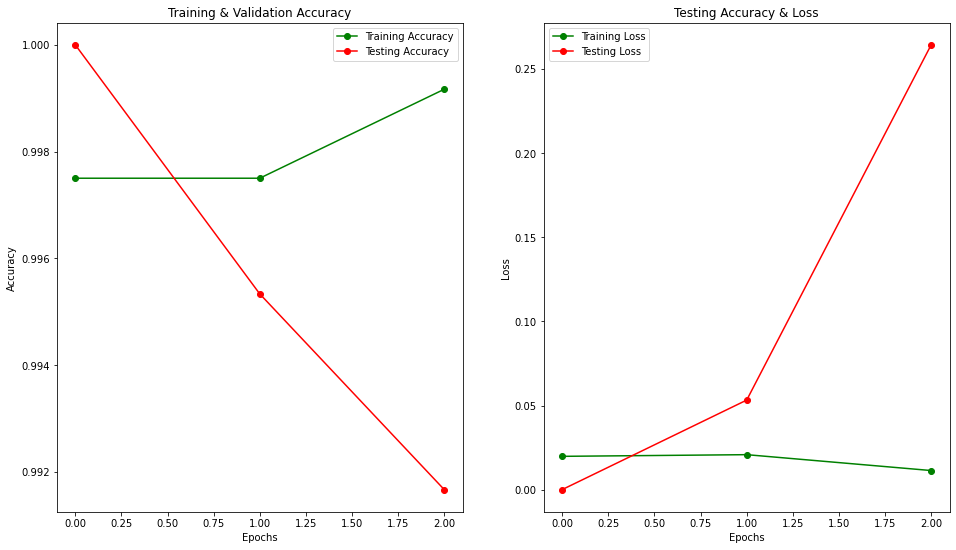

In [ ]:
import matplotlib.pyplot as plt 

epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
from google.colab import files
!zip -r PeaceModel.zip /content/PeaceModel.tfl

  adding: content/PeaceModel.tfl/ (stored 0%)
  adding: content/PeaceModel.tfl/assets/ (stored 0%)
  adding: content/PeaceModel.tfl/saved_model.pb (deflated 90%)
  adding: content/PeaceModel.tfl/variables/ (stored 0%)
  adding: content/PeaceModel.tfl/variables/variables.index (deflated 69%)
  adding: content/PeaceModel.tfl/variables/variables.data-00000-of-00001 (deflated 9%)
